# Second-order matrix case

In [37]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit_aer import Aer
import networkx as nx
import matplotlib.pyplot as plt

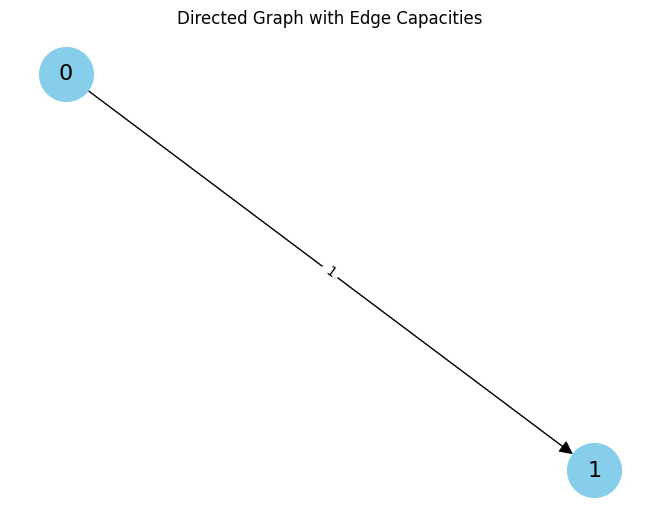

In [38]:
G = nx.DiGraph()

G.add_nodes_from([0, 1])

edges = [(0, 1, {'capacity': 1})]

G.add_edges_from(edges)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=1, font_size=16,
        arrows=True, arrowsize=20)
labels = nx.get_edge_attributes(G, 'capacity')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Directed Graph with Edge Capacities')
plt.show()


In [39]:
qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[0])

circuit.measure(qreg_q[0], creg_c[0])

In [40]:
simulator = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, simulator)

job = simulator.run(transpiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts(circuit)
print(counts.keys())
print(counts.values())

dict_keys(['1'])
dict_values([1024])


In [41]:
if '1' in counts.keys():
    print('The edge exists')
else:
    print('The edge does not exist')

The edge exists


Suppose that there are N vertices, and that there is one and only one edge between each vertex that is directed and has weight 1. The number of edges is not greater than N(N-1). I use a matrix to represent whether or not there is an edge between each vertex, with the x-axis as the starting point and the y-axis as the end point. Because quantum circuits do not support many of the data structures found in classical circuits, a prescribed way of recording the data structures is used.

Next demonstrate a directed graph with two nodes.

In [42]:
edges = [(0, 1, {'capacity': 1})]

The matrix representation of this graph is:

In [43]:
matrix = [[0, 1],
          [0, 0]]

Since a quantum bit can only store one value, I use four quantum bits to represent this matrix.
The first quantum bit represents the first row and first column of the matrix, the second quantum bit represents the first row and second column of the matrix , the third quantum bit represents the second row and first column of the matrix, and the fourth quantum bit represents the second column and second column of the matrix. If the value of the quantum bit is 1, it means there is an edge, otherwise it means there is no edge.

In [44]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[1])

circuit.measure(qreg_q[1], creg_c[0])

print(circuit)

     ┌───┐                  
q_0: ┤ H ├───────■──────────
     ├───┤┌───┐┌─┴─┐┌───┐┌─┐
q_1: ┤ X ├┤ H ├┤ X ├┤ H ├┤M├
     └───┘└───┘└───┘└───┘└╥┘
c: 1/═════════════════════╩═
                          0 


In [45]:
simulator = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, simulator)

job = simulator.run(transpiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts(circuit)
print(counts.keys())
print(counts.values())

dict_keys(['1'])
dict_values([1024])


Enhanced Suitability encapsulates it with the parameters matrix, the start and end points of the edge, and the return value whether this edge exists or not.

In [46]:
def is_edge_exist(matrix, start, end):
    qreg_q = QuantumRegister(2, 'q')
    creg_c = ClassicalRegister(1, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    if matrix[start][end] == 1:
        circuit.x(qreg_q[1])
    circuit.h(qreg_q[0])
    circuit.h(qreg_q[1])
    circuit.cx(qreg_q[0], qreg_q[1])
    circuit.h(qreg_q[1])

    circuit.measure(qreg_q[1], creg_c[0])

    simulator = Aer.get_backend('qasm_simulator')
    transpiled_circuit = transpile(circuit, simulator)

    job = simulator.run(transpiled_circuit, shots=1024)
    result = job.result()
    counts = result.get_counts(circuit)
    if '1' in counts.keys():
        return True
    else:
        return False

Test the function

In [47]:
matrix = [[0, 1],
          [0, 0]]
print(is_edge_exist(matrix, 0, 1))
print(is_edge_exist(matrix, 1, 0))

True
False
